# Modelagem Estatística dos Dados

Testes estatísticos como: t-testes, testes de qui-quadrado, análise de variância, etc. buscam esclarecer se grupos Ou os efeitos são "estatisticamente significativos".

Apesar disso, a significância estatística é um objetivo questionável para a inferência estatística, pois é de utilidade limitada.

Uma abordagem muito mais poderosa para a análise estatística envolve a construção de modelos ** flexíveis ** com o objetivo geral de * estimar * quantidades de interesse. 

Este tutorial mostra como usar o Python para construir modelos estatísticos facilmente a partir do zero e usá-los para extrair estimativas e medidas de incerteza associadas.

In [22]:
#importando as principais biliotecas
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# configurando algumas opções do pandas
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

Estimativa
==========

Um problema estatístico recorrente é encontrar estimativas dos parâmetros relevantes que correspondem à distribuição que melhor representa nossos dados.

Na inferência ** paramétrica **, especificamos * a priori * uma distribuição adequada, então escolhemos os parâmetros que melhor se adequam aos dados.

* por exemplo: $\mu$ and $\sigma^2$ no caso da distribuição normal

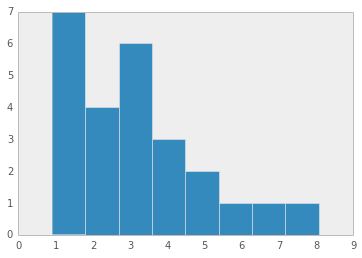

In [2]:
x = array([ 1.00201077,  1.58251956,  0.94515919,  6.48778002,  1.47764604,
        5.18847071,  4.21988095,  2.85971522,  3.40044437,  3.74907745,
        1.18065796,  3.74748775,  3.27328568,  3.19374927,  8.0726155 ,
        0.90326139,  2.34460034,  2.14199217,  3.27446744,  3.58872357,
        1.20611533,  2.16594393,  5.56610242,  4.66479977,  2.3573932 ])
_ = hist(x, bins=8)

### Ajustando a distribuições de probabilidade dos dados


Começamos com o problema de encontrar valores para os parâmetros que proporcionam o melhor ajuste entre o modelo e os dados, denominados estimativas pontuais (point estimates). 

Primeiro, precisamos definir o que queremos dizer com "melhor ajuste". 

Existem dois critérios comumente usados:

* ** Método dos momentos (Method of moments) ** escolhe os parâmetros para que os momentos da amostra (tipicamente a média e variância da amostra) correspondam aos momentos teóricos da nossa distribuição escolhida.

* ** Máxima probabilidade (Maximum likelihood) ** escolhe os parâmetros para maximizar a probabilidade, o que mede a probabilidade de observar nossa amostra.

### Variáveis aleatórias discretas

$$X = \{0,1\}$$

$$Y = \{\ldots,-2,-1,0,1,2,\ldots\}$$

**Função massa de probabilidade**:  associa a cada possível ocorrência de uma variável aleatória discreta uma probabilidade

variável aleatória discreta $X$,

$$Pr(X=x) = f(x|\theta)$$

![Discrete variable](http://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg)

***por exemplo. Distribuição de Poisson***

Os modelos de distribuição de Poisson possuem contagens ilimitadas:

<div style="font-size: 150%;">  
$$Pr(X=x)=\frac{e^{-\lambda}\lambda^x}{x!}$$

* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$

$$E(X) = \text{Var}(X) = \lambda$$

### Variáveis aleatórias contínuas

$$X \in [0,1]$$

$$Y \in (-\infty, \infty)$$

**Função densidade de probabilidade **: 

Para $X$ contínuo,

$$Pr(x \le X \le x + dx) = f(x|\theta)dx \, \text{ as } \, dx \rightarrow 0$$

![Continuous variable](http://upload.wikimedia.org/wikipedia/commons/e/ec/Exponential_pdf.svg)

***por exemplo. distribuição normal***

<div style="font-size: 100%;">  
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$

* $X \in \mathbf{R}$
* $\mu \in \mathbf{R}$
* $\sigma>0$

$$\begin{align}E(X) &= \mu \cr
\text{Var}(X) &= \sigma^2 \end{align}$$

### Exemplo: Precipitação de Nashville

O conjunto de dados `nashville_precip.txt` contém [Dados de precipitação NOAA para Nashville medidos desde 1871] (http://bit.ly/nasvhville_precip_data). 

A distribuição da gama é, muitas vezes, um ajuste adequado aos dados agregados de precipitação , e será nossa candidata a distribuição neste caso.

In [5]:
precip = pd.read_table("nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

       Jan   Feb   Mar    Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                         
1871  2.76  4.58  5.01   4.13  3.30  2.98  1.58  2.36  0.95  1.31  2.13  1.65
1872  2.32  2.11  3.14   5.91  3.09  5.17  6.10  1.65  4.50  1.58  2.25  2.38
1873  2.96  7.14  4.11   3.59  6.31  4.20  4.63  2.36  1.81  4.28  4.36  5.94
1874  5.22  9.23  5.36  11.84  1.49  2.87  2.65  3.52  3.12  2.63  6.12  4.19
1875  6.15  3.06  8.14   4.22  1.73  5.63  8.12  1.60  3.79  1.25  5.46  4.30

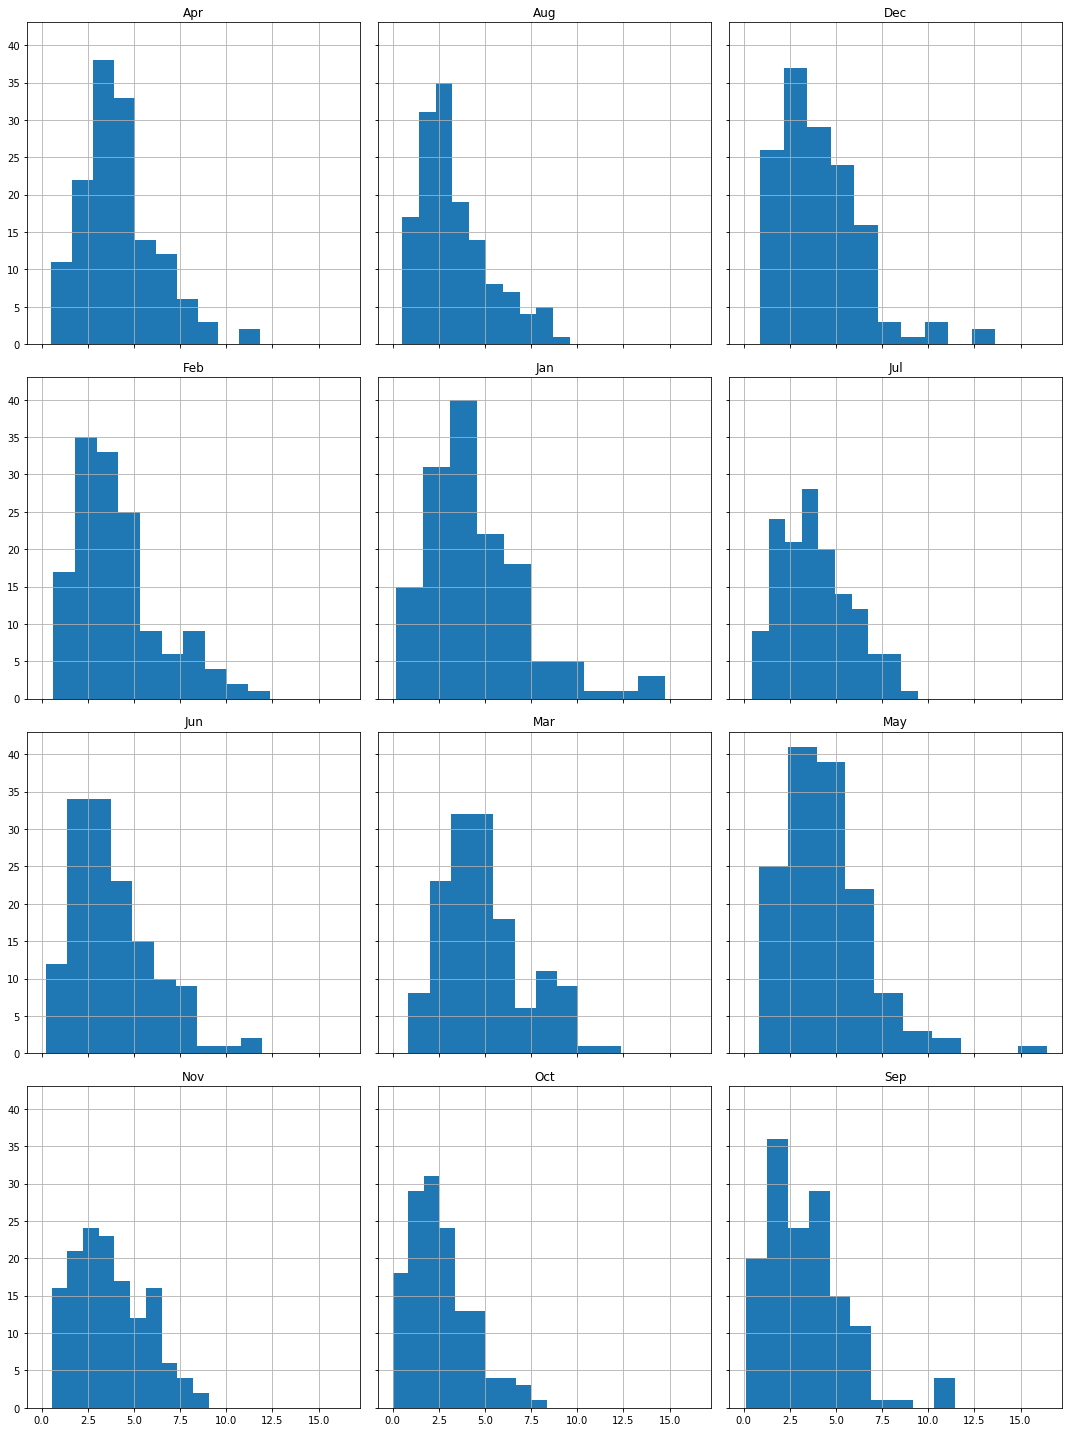

In [23]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
_ = precip.hist(sharex=True, sharey=True, grid=True,ax = ax)
plt.tight_layout()

O primeiro passo é reconhecer o tipo de distribuição para se adequar aos nossos dados. Algumas observações:

1. Os dados estão distorcidos, com uma cauda mais longa à direita do que à esquerda
2. Os dados são de valor positivo, uma vez que estão medindo a precipitação
3. Os dados são contínuos

Existem algumas escolhas possíveis, mas uma alternativa adequada é a ** distribuição gama **:

A distribuição gama é uma das mais gerais distribuições, pois diversas distribuições são caso particular dela como por exemplo a exponencial, a qui-quadrado, entre outras. Essa distribuição tem como suas principais aplicações à análise de tempo de vida de produtos.


<div style="font-size: 150%;">  
$$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

![gamma](http://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Gamma_distribution_pdf.svg/500px-Gamma_distribution_pdf.svg.png)

O *** método de momentos *** simplesmente atribui a média empírica e variância a suas contrapartes teóricas, para que possamos resolver os parâmetros.

Assim, para a distribuição da gama, a média e variância são:

<div style="font-size: 150%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

Então, se resolvermos esses parâmetros, podemos usar uma distribuição gama para descrever nossos dados:

<div style="font-size: 150%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

Verficiando a existência de valores ausentes

In [27]:
precip.isnull().sum()

Jan    0
Feb    0
Mar    0
Apr    0
May    0
Jun    0
Jul    0
Aug    0
Sep    0
Oct    0
Nov    0
Dec    0
dtype: int64

Agora, vamos calcular os exemplos de momentos de interesse, os meios e variâncias por mês:

In [28]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [29]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

Usamos esses momentos para estimar $\alpha$ e $\beta$ para cada mês:

In [30]:
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean

In [31]:
alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.485616
 Nov    3.692511
 Dec    3.219070
 dtype: float64, Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.050243
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

Podemos usar a função `gamma.pdf` em` scipy.stats.distributions` para traçar as distribuições implícitas pelos alfas e betas calculados. Por exemplo, aqui é janeiro:

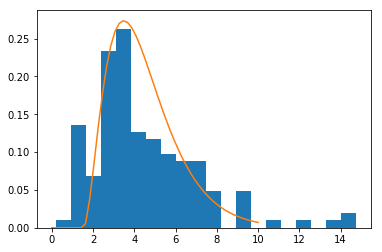

In [49]:
from scipy.stats.distributions import gamma
plt.hist(precip.Jan, normed=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

Looping durante todos os meses, podemos criar uma grade de parcelas para a distribuição de chuvas, usando a distribuição gama:

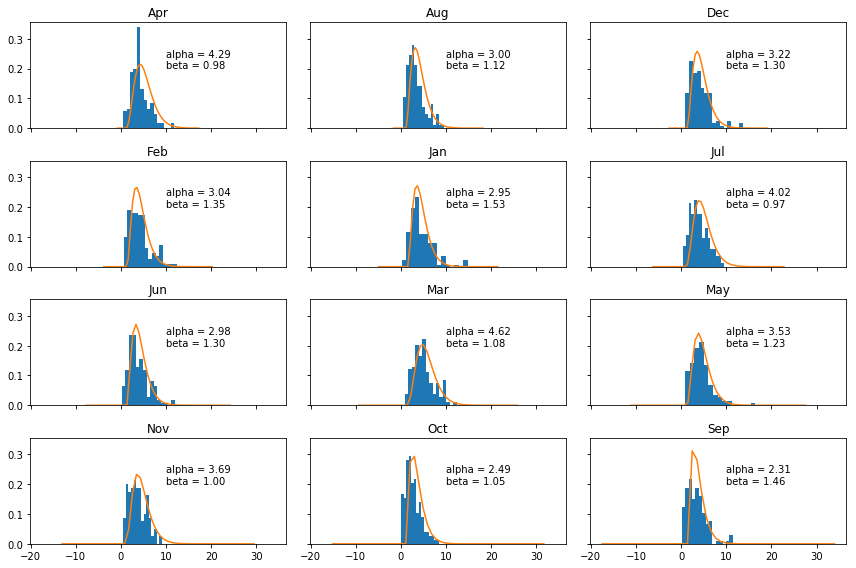

In [51]:
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=False)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()

Máxima Verossimilhança
==================

** A máxima verossimilhança ** (ML) é geralmente mais trabalhoso do que o método dos momentos, mas é preferível como estimador resultante sendo conhecido por ter boas propriedades teóricas. Há uma tonelada de teoria em relação ao ML. Nós nos restringiremos à uma abordagem mais prática.

Digamos que temos alguns dados $y = y_1,y_2,\ldots,y_n$ que é distribuído de acordo com alguma distribuição:

<div style="font-size: 120%;">  
$$Pr(Y_i=y_i | \theta)$$
</div>

Aqui, por exemplo, é uma ** distribuição de Poisson ** que descreve a distribuição de algumas variáveis discretas, tipicamente  *contagens*:

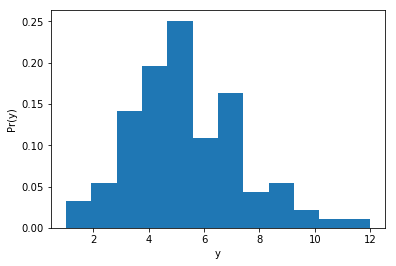

In [53]:
y = np.random.poisson(5, size=100)
plt.hist(y, bins=12, normed=True)
plt.xlabel('y'); plt.ylabel('Pr(y)')

O produto $\prod_{i=1}^n Pr(y_i | \theta)$ Nos dá uma medida de como ** provável ** é observar valores $y_1,\ldots,y_n$ dado o parâmetro $\theta$. O ajuste de máxima verossimilhança consiste em escolher a função apropriada $l= Pr(Y|\theta)$ Para maximizar um determinado conjunto de observações. Chamamos essa função da * função de verossimilhança *, porque é uma medida da probabilidade de as observações serem se o modelo for verdadeiro.

> Com esses dados, quão provável é esse modelo?

No modelo acima, os dados foram extraídos de uma distribuição de Poisson com o parâmetro $\lambda =5$.

$$L(y|\lambda=5) = \frac{e^{-5} 5^y}{y!}$$

Então, para qualquer valor de $y$, podemos calcular sua probabilidade:

In [54]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

lam = 6
value = 10
poisson_like(value, lam)

0.041303093412337726

In [55]:
np.sum(poisson_like(yi, lam) for yi in y)

12.076449700795251

In [56]:
lam = 8
np.sum(poisson_like(yi, lam) for yi in y)

8.3840413347438751

Podemos traçar a função de verossimilhança para qualquer valor do (s) parâmetro (s):

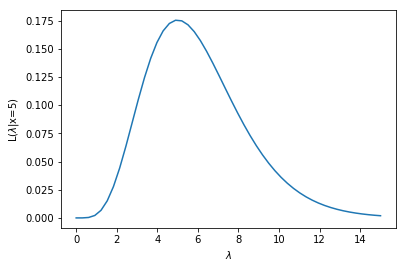

In [58]:
lambdas = np.linspace(0,15)
x = 5
plt.plot(lambdas, [poisson_like(x, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(x))

How is the likelihood function different than the probability distribution function (PDF)? The likelihood is a function of the parameter(s) *given the data*, whereas the PDF returns the probability of data given a particular parameter value. Here is the PDF of the Poisson for $\lambda=5$.

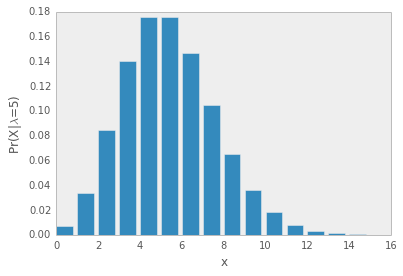

In [17]:
lam = 5
xvals = arange(15)
plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
xlabel('x')
ylabel('Pr(X|$\lambda$=5)')

Por que estamos interessados na função de verossimilhança?

Uma estimativa razoável do valor verdadeiro e desconhecido para o parâmetro é aquele que ** maximiza a função de verossimilhança **. Assim, a inferência é reduzida a um problema de otimização.

Going back to the rainfall data, if we are using a gamma distribution we need to maximize:

$$\begin{align}l(\alpha,\beta) &= \sum_{i=1}^n \log[\beta^{\alpha} x^{\alpha-1} e^{-x/\beta}\Gamma(\alpha)^{-1}] \cr 
&= n[(\alpha-1)\overline{\log(x)} - \bar{x}\beta + \alpha\log(\beta) - \log\Gamma(\alpha)]\end{align}$$

(*Its usually easier to work in the log scale*)

where $n = 2012 − 1871 = 141$ and the bar indicates an average over all *i*. We choose $\alpha$ and $\beta$ to maximize $l(\alpha,\beta)$.

Notice $l$ is infinite if any $x$ is zero. We do not have any zeros, but we do have an NA value for one of the October data, which we dealt with above.

### Finding the MLE

To find the maximum of any function, we typically take the *derivative* with respect to the variable to be maximized, set it to zero and solve for that variable. 

$$\frac{\partial l(\alpha,\beta)}{\partial \beta} = n\left(\frac{\alpha}{\beta} - \bar{x}\right) = 0$$

Which can be solved as $\beta = \alpha/\bar{x}$. However, plugging this into the derivative with respect to $\alpha$ yields:

$$\frac{\partial l(\alpha,\beta)}{\partial \alpha} = \log(\alpha) + \overline{\log(x)} - \log(\bar{x}) - \frac{\Gamma(\alpha)'}{\Gamma(\alpha)} = 0$$

This has no closed form solution. We must use ***numerical optimization***!

Numerical optimization alogarithms take an initial "guess" at the solution, and iteratively improve the guess until it gets "close enough" to the answer.

Here, we will use Newton-Raphson algorithm:

<div style="font-size: 120%;">  
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
</div>

Which is available to us via SciPy:

In [18]:
from scipy.optimize import newton

Here is a graphical example of how Newtone-Raphson converges on a solution, using an arbitrary function:

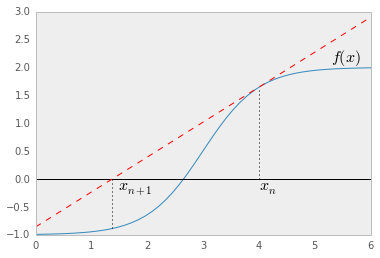

In [19]:
# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plot(xvals, func(xvals))
text(5.3, 2.1, '$f(x)$', fontsize=16)
# zero line
plot([0,6], [0,0], 'k-')
# value at step n
plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)
# tangent line
tanline = lambda x: -0.858 + 0.626*x
plot(xvals, tanline(xvals), 'r--')
# point at step n+1
xprime = 0.858/0.626
plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)

To apply the Newton-Raphson algorithm, we need a function that returns a vector containing the **first and second derivatives** of the function with respect to the variable of interest. In our case, this is:

In [20]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

where `log_mean` and `mean_log` are $\log{\bar{x}}$ and $\overline{\log(x)}$, respectively. `psi` and `polygamma` are complex functions of the Gamma function that result when you take first and second derivatives of that function.

In [21]:
# Calculate statistics
log_mean = precip.mean().apply(log)
mean_log = precip.apply(log).mean()

Time to optimize!

In [22]:
# Alpha MLE for December
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

3.5189679152399647

And now plug this back into the solution for beta:

<div style="font-size: 120%;">  
$$ \beta  = \frac{\alpha}{\bar{X}} $$

In [23]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

0.84261607548413797

We can compare the fit of the estimates derived from MLE to those from the method of moments:

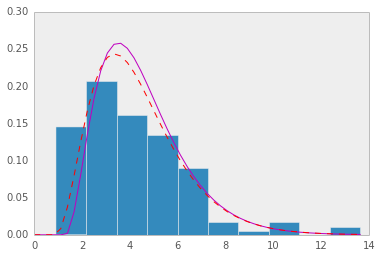

In [24]:
dec = precip.Dec
dec.hist(normed=True, bins=10, grid=False)
x = linspace(0, dec.max())
plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'm-')
plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

For some common distributions, SciPy includes methods for fitting via MLE:

In [25]:
from scipy.stats import gamma

gamma.fit(precip.Dec)

(2.2427517865962434, 0.65494603858755807, 1.5700739281147422)

This fit is not directly comparable to our estimates, however, because SciPy's `gamma.fit` method fits an odd 3-parameter version of the gamma distribution.

### Example: truncated distribution

Suppose that we observe $Y$ truncated below at $a$ (where $a$ is known). If $X$ is the distribution of our observation, then:

$$ P(X \le x) = P(Y \le x|Y \gt a) = \frac{P(a \lt Y \le x)}{P(Y \gt a)}$$

(so, $Y$ is the original variable and $X$ is the truncated variable) 

Then X has the density:

$$f_X(x) = \frac{f_Y (x)}{1−F_Y (a)} \, \text{for} \, x \gt a$$ 

Suppose $Y \sim N(\mu, \sigma^2)$ and $x_1,\ldots,x_n$ are independent observations of $X$. We can use maximum likelihood to find $\mu$ and $\sigma$. 

First, we can simulate a truncated distribution using a `while` statement to eliminate samples that are outside the support of the truncated distribution.

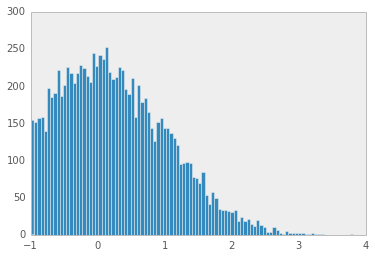

In [26]:
x = np.random.normal(size=10000)
a = -1
x_small = x < a
while x_small.sum():
    x[x_small] = np.random.normal(size=x_small.sum())
    x_small = x < a
    
_ = hist(x, bins=100)

We can construct a log likelihood for this function using the conditional form:

$$f_X(x) = \frac{f_Y (x)}{1−F_Y (a)} \, \text{for} \, x \gt a$$ 

In [27]:
from scipy.stats.distributions import norm

trunc_norm = lambda theta, a, x: -(np.log(norm.pdf(x, theta[0], theta[1])) - 
                                      np.log(1 - norm.cdf(a, theta[0], theta[1]))).sum()

For this example, we will use another optimization algorithm, the **Nelder-Mead simplex algorithm**. It has a couple of advantages: 

- it does not require derivatives
- it can optimize (minimize) a vector of parameters

SciPy implements this algorithm in its `fmin` function:

In [28]:
from scipy.optimize import fmin

fmin(trunc_norm, np.array([1,2]), args=(-1, x))

Optimization terminated successfully.
         Current function value: 10930.807932
         Iterations: 47
         Function evaluations: 89


array([-0.01353635,  0.9928185 ])

In general, simulating data is a terrific way of testing your model before using it with real data.

### Kernel density estimates

In some instances, we may not be interested in the parameters of a particular distribution of data, but just a smoothed representation of the data at hand. In this case, we can estimate the disribution *non-parametrically* (i.e. making no assumptions about the form of the underlying distribution) using kernel density estimation.

In [29]:
# Some random data
y = np.random.random(15) * 10
y

array([ 4.74511593,  7.90840801,  0.4757153 ,  2.20288601,  1.84984043,
        7.10173654,  2.44884627,  1.34956892,  6.86027822,  3.71783498,
        7.42356175,  4.07499025,  1.42352956,  3.6932789 ,  9.22449069])

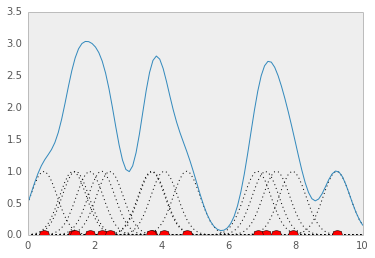

In [30]:
x = np.linspace(0, 10, 100)
# Smoothing parameter
s = 0.4
# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])
plot(x, kernels, 'k:')
plot(x, kernels.sum(1))
plot(y, np.zeros(len(y)), 'ro', ms=10)

SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth. Let's create a bi-modal distribution of data that is not easily summarized by a parametric distribution:

In [31]:
# Create a bi-modal distribution with a mixture of Normals.
x1 = np.random.normal(0, 3, 50)
x2 = np.random.normal(4, 1, 50)

# Append by row
x = np.r_[x1, x2]

(array([ 0.03623044,  0.04830725,  0.06038407,  0.07246088,  0.03623044,
        0.15096017,  0.18719061,  0.01207681]),
 array([-6.09280539, -4.4367394 , -2.78067341, -1.12460742,  0.53145857,
        2.18752456,  3.84359055,  5.49965654,  7.15572253]),
 <a list of 8 Patch objects>)

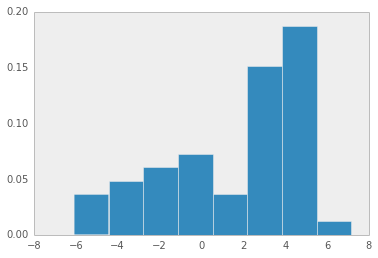

In [32]:
plt.hist(x, bins=8, normed=True)

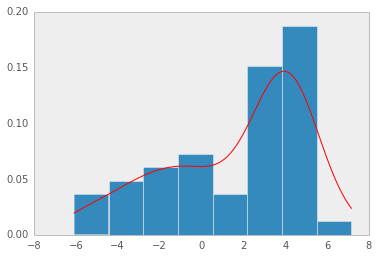

In [33]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=8, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

### Exercise: Cervical dystonia analysis

Recall the cervical dystonia database, which is a clinical trial of botulinum toxin type B (BotB) for patients with cervical dystonia from nine U.S. sites. The response variable is measurements on the Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment). One way to check the efficacy of the treatment is to compare the distribution of TWSTRS for control and treatment patients at the end of the study.

Use the method of moments or MLE to calculate the mean and variance of TWSTRS at week 16 for one of the treatments and the control group. Assume that the distribution of the `twstrs` variable is normal:

$$f(x \mid \mu, \sigma^2) = \sqrt{\frac{1}{2\pi\sigma^2}} \exp\left\{ -\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2} \right\}$$

array([[<matplotlib.axes.AxesSubplot object at 0x1140d01d0>,
        <matplotlib.axes.AxesSubplot object at 0x114299f50>]], dtype=object)

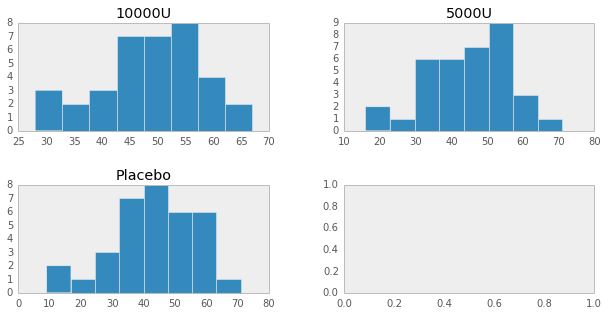

In [34]:
    cdystonia = pd.read_csv("data/cdystonia.csv")
cdystonia[cdystonia.obs==6].hist(column='twstrs', by=cdystonia.treat, bins=8)

## Regression models

A general, primary goal of many statistical data analysis tasks is to relate the influence of one variable on another. For example, we may wish to know how different medical interventions influence the incidence or duration of disease, or perhaps a how baseball player's performance varies as a function of age.

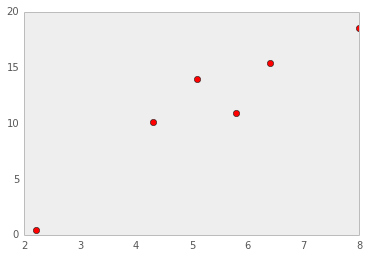

In [35]:
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
plot(x,y,'ro')

We can build a model to characterize the relationship between $X$ and $Y$, recognizing that additional factors other than $X$ (the ones we have measured or are interested in) may influence the response variable $Y$.

<div style="font-size: 150%;">  
$y_i = f(x_i) + \epsilon_i$
</div>

where $f$ is some function, for example a linear function:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
</div>

and $\epsilon_i$ accounts for the difference between the observed response $y_i$ and its prediction from the model $\hat{y_i} = \beta_0 + \beta_1 x_i$. This is sometimes referred to as **process uncertainty**.

We would like to select $\beta_0, \beta_1$ so that the difference between the predictions and the observations is zero, but this is not usually possible. Instead, we choose a reasonable criterion: ***the smallest sum of the squared differences between $\hat{y}$ and $y$***.

<div style="font-size: 120%;">  
$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$  
</div>

Squaring serves two purposes: (1) to prevent positive and negative values from cancelling each other out and (2) to strongly penalize large deviations. Whether the latter is a good thing or not depends on the goals of the analysis.

In other words, we will select the parameters that minimize the squared error of the model.

In [36]:
ss = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x) ** 2)

In [37]:
ss([0,1],x,y)

333.35000000000002

In [38]:
b0,b1 = fmin(ss, [0,1], args=(x,y))
b0,b1

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(-4.3500136038870876, 3.0000002915386412)

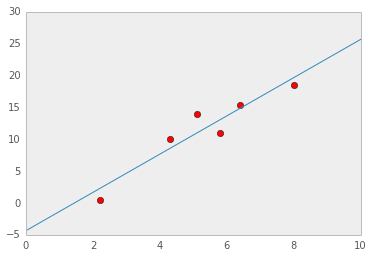

In [39]:
plot(x, y, 'ro')
plot([0,10], [b0, b0+b1*10])

(0, 20)

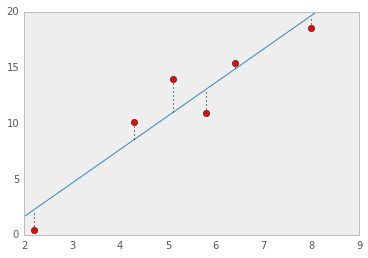

In [40]:
plot(x, y, 'ro')
plot([0,10], [b0, b0+b1*10])
for xi, yi in zip(x,y):
    plot([xi]*2, [yi, b0+b1*xi], 'k:')
xlim(2, 9); ylim(0, 20)

Minimizing the sum of squares is not the only criterion we can use; it is just a very popular (and successful) one. For example, we can try to minimize the sum of absolute differences:

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77
0.00157170444494 2.31231743181


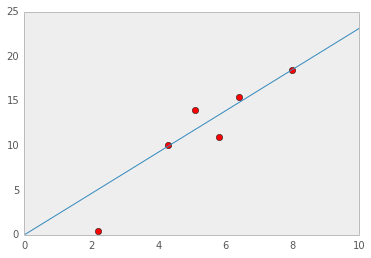

In [41]:
sabs = lambda theta, x, y: np.sum(np.abs(y - theta[0] - theta[1]*x))
b0,b1 = fmin(sabs, [0,1], args=(x,y))
print b0,b1
plot(x, y, 'ro')
plot([0,10], [b0, b0+b1*10])

We are not restricted to a straight-line regression model; we can represent a curved relationship between our variables by introducing **polynomial** terms. For example, a cubic model:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$
</div>

Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372
-11.0748186039 6.0576975948 -0.302681057088


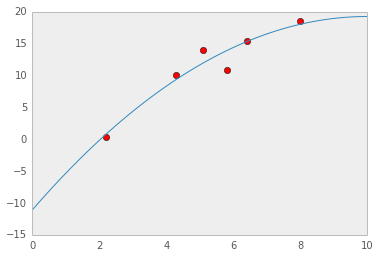

In [42]:
ss2 = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2)) ** 2)
b0,b1,b2 = fmin(ss2, [1,1,-1], args=(x,y))
print b0,b1,b2
plot(x, y, 'ro')
xvals = np.linspace(0, 10, 100)
plot(xvals, b0 + b1*xvals + b2*(xvals**2))

Although polynomial model characterizes a nonlinear relationship, it is a linear problem in terms of estimation. That is, the regression model $f(y | x)$ is linear in the parameters.

For some data, it may be reasonable to consider polynomials of order>2. For example, consider the relationship between the number of home runs a baseball player hits and the number of runs batted in (RBI) they accumulate; clearly, the relationship is positive, but we may not expect a linear relationship.

Optimization terminated successfully.
         Current function value: 4274.128398
         Iterations: 230
         Function evaluations: 407


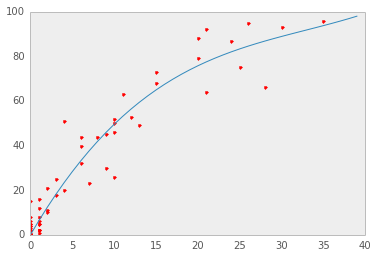

In [43]:
ss3 = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2) - theta[3]*(x**3)) ** 2)

bb = pd.read_csv("data/baseball.csv", index_col=0)
plot(bb.hr, bb.rbi, 'r.')
b0,b1,b2,b3 = fmin(ss3, [0,1,-1,0], args=(bb.hr, bb.rbi))
xvals = arange(40)
plot(xvals, b0 + b1*xvals + b2*(xvals**2) + b3*(xvals**3))

Of course, we need not fit least squares models by hand. The `statsmodels` package implements least squares models that allow for model fitting in a single line:

In [44]:
import statsmodels.api as sm

straight_line = sm.OLS(y, sm.add_constant(x)).fit()
straight_line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     32.67
Date:                Mon, 24 Jun 2013   Prob (F-statistic):            0.00463
Time:                        21:24:18   Log-Likelihood:                -12.325
No. Observations:                   6   AIC:                             28.65
Df Residuals:                       4   BIC:                             28.23
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.3500      2.937     -1.481      0.213       -12.505     3.805
x1             3.0000      0.525      5.716      0.005         1.543     4.457
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.387
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.570
Skew:                           0.359   Prob(JB):                        0.752
Kurtosis:                       1.671   Cond. No.                         17.9
==============================================================================
"""

In [45]:
from statsmodels.formula.api import ols as OLS

data = pd.DataFrame(dict(x=x, x2=x**2, y=y))
cubic_fit = OLS('y ~ x + x2', data).fit()

cubic_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     19.50
Date:                Mon, 24 Jun 2013   Prob (F-statistic):             0.0191
Time:                        21:24:18   Log-Likelihood:                -11.056
No. Observations:                   6   AIC:                             28.11
Df Residuals:                       3   BIC:                             27.49
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -11.0748      6.013     -1.842      0.163       -30.211     8.062
x              6.0577      2.482      2.441      0.092        -1.840    13.955
x2            -0.3027      0.241     -1.257      0.298        -1.069     0.464
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.711
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.655
Skew:                          -0.809   Prob(JB):                        0.721
Kurtosis:                       2.961   Cond. No.                         270.
==============================================================================
"""

### Exercise: Polynomial function

Write a function that specified a polynomial of arbitrary degree.

## Model Selection

How do we choose among competing models for a given dataset? More parameters are not necessarily better, from the standpoint of model fit. For example, fitting a 9-th order polynomial to the sample data from the above example certainly results in an overfit.

Optimization terminated successfully.
         Current function value: 7.015262
         Iterations: 663
         Function evaluations: 983


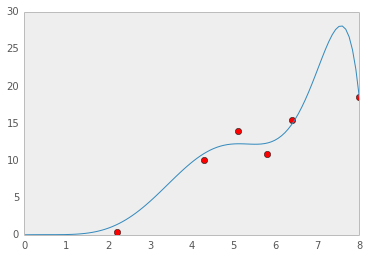

In [46]:
def calc_poly(params, data):
        x = np.c_[[data**i for i in range(len(params))]]
        return np.dot(params, x)
    
ssp = lambda theta, x, y: np.sum((y - calc_poly(theta, x)) ** 2)
betas = fmin(ssp, np.zeros(10), args=(x,y), maxiter=1e6)
plot(x, y, 'ro')
xvals = np.linspace(0, max(x), 100)
plot(xvals, calc_poly(betas, xvals))

One approach is to use an information-theoretic criterion to select the most appropriate model. For example **Akaike's Information Criterion (AIC)** balances the fit of the model (in terms of the likelihood) with the number of parameters required to achieve that fit. We can easily calculate AIC as:

$$AIC = n \log(\hat{\sigma}^2) + 2p$$

where $p$ is the number of parameters in the model and $\hat{\sigma}^2 = RSS/(n-p-1)$.

Notice that as the number of parameters increase, the residual sum of squares goes down, but the second term (a penalty) increases.

To apply AIC to model selection, we choose the model that has the **lowest** AIC value.

In [47]:
n = len(x)

aic = lambda rss, p, n: n * np.log(rss/(n-p-1)) + 2*p

RSS1 = ss(fmin(ss, [0,1], args=(x,y)), x, y)
RSS2 = ss2(fmin(ss2, [1,1,-1], args=(x,y)), x, y)

print aic(RSS1, 2, n), aic(RSS2, 3, n)

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372
15.7816583572 17.6759368019


Hence, we would select the 2-parameter (linear) model.

## Logistic Regression

Fitting a line to the relationship between two variables using the least squares approach is sensible when the variable we are trying to predict is continuous, but what about when the data are dichotomous?

- male/female
- pass/fail
- died/survived

Let's consider the problem of predicting survival in the Titanic disaster, based on our available information. For example, lets say that we want to predict survival as a function of the fare paid for the journey.

In [48]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.name

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                Anderson, Mr. Harry
6                  Andrews, Miss. Kornelia Theodosia
7                             Andrews, Mr. Thomas Jr
8      Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                            Artagaveytia, Mr. Ramon
...
1298                  Wittevrongel, Mr. Camille
1299                        Yasbeck, Mr. Antoni
1300    Yasbeck, Mrs. Antoni (Selini Alexander)
1301                       Youseff, Mr. Gerious
1302                          Yousif, Mr. Wazli
1303                      Yousseff, Mr. Gerious
1304                       Zabour, Miss. Hileni
1305                      Zabour, Miss. Thamine
1306                  Zakarian, Mr. Mapriededer
1307                        Zakari

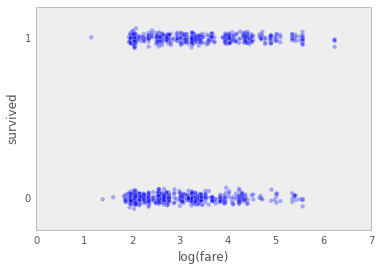

In [49]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
plt.scatter(np.log(titanic.fare), titanic.survived + jitter, alpha=0.3)
yticks([0,1])
ylabel("survived")
xlabel("log(fare)")

I have added random jitter on the y-axis to help visualize the density of the points, and have plotted fare on the log scale.

Clearly, fitting a line through this data makes little sense, for several reasons. First, for most values of the predictor variable, the line would predict values that are not zero or one. Second, it would seem odd to choose least squares (or similar) as a criterion for selecting the best line.

In [50]:
x = np.log(titanic.fare[titanic.fare>0])
y = titanic.survived[titanic.fare>0]
betas_titanic = fmin(ss, [1,1], args=(x,y))

Optimization terminated successfully.
         Current function value: 277.621917
         Iterations: 55
         Function evaluations: 103


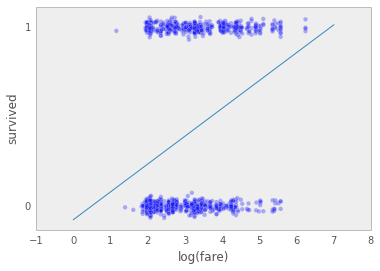

In [51]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
plt.scatter(np.log(titanic.fare), titanic.survived + jitter, alpha=0.3)
yticks([0,1])
ylabel("survived")
xlabel("log(fare)")
plt.plot([0,7], [betas_titanic[0], betas_titanic[0] + betas_titanic[1]*7.])

If we look at this data, we can see that for most values of `fare`, there are some individuals that survived and some that did not. However, notice that the cloud of points is denser on the "survived" (y=1) side for larger values of fare than on the "died" (y=0) side.

### Stochastic model

Rather than model the binary outcome explicitly, it makes sense instead to model the *probability* of death or survival in a **stochastic** model. Probabilities are measured on a continuous [0,1] scale, which may be more amenable for prediction using a regression line. We need to consider a different probability model for this exerciese however; let's consider the **Bernoulli** distribution as a generative model for our data:

<div style="font-size: 120%;">  
$$f(y|p) = p^{y} (1-p)^{1-y}$$ 
</div>  

where $y = \{0,1\}$ and $p \in [0,1]$. So, this model predicts whether $y$ is zero or one as a function of the probability $p$. Notice that when $y=1$, the $1-p$ term disappears, and when $y=0$, the $p$ term disappears.

So, the model we want to fit should look something like this:

<div style="font-size: 120%;">  
$$p_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

However, since $p$ is constrained to be between zero and one, it is easy to see where a linear (or polynomial) model might predict values outside of this range. We can modify this model sligtly by using a **link function** to transform the probability to have an unbounded range on a new scale. Specifically, we can use a **logit transformation** as our link function:

<div style="font-size: 120%;">  
$$\text{logit}(p) = \log\left[\frac{p}{1-p}\right] = x$$

Here's a plot of $p/(1-p)$

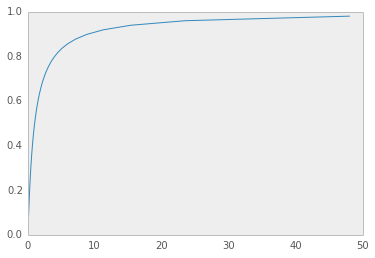

In [52]:
logit = lambda p: np.log(p/(1.-p))
unit_interval = np.linspace(0,1)
plt.plot(unit_interval/(1-unit_interval), unit_interval)

And here's the logit function:

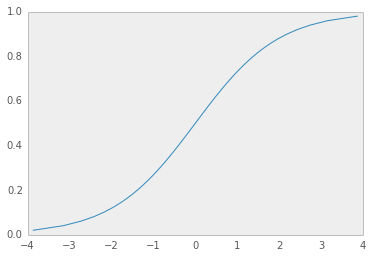

In [53]:
plt.plot(logit(unit_interval), unit_interval)

The inverse of the logit transformation is:

<div style="font-size: 150%;">  
$$p = \frac{1}{1 + \exp(-x)}$$

So, now our model is:

<div style="font-size: 120%;">  
$$\text{logit}(p_i) = \beta_0 + \beta_1 x_i + \epsilon_i$$

We can fit this model using maximum likelihood. Our likelihood, again based on the Bernoulli model is:

<div style="font-size: 120%;">  
$$L(y|p) = \prod_{i=1}^n p_i^{y_i} (1-p_i)^{1-y_i}$$

which, on the log scale is:

<div style="font-size: 120%;">  
$$l(y|p) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$

We can easily implement this in Python, keeping in mind that `fmin` minimizes, rather than maximizes functions:

In [54]:
invlogit = lambda x: 1. / (1 + np.exp(-x))

def logistic_like(theta, x, y):
    p = invlogit(theta[0] + theta[1] * x)
    # Return negative of log-likelihood
    return -np.sum(y * np.log(p) + (1-y) * np.log(1 - p))

Remove null values from variables

In [70]:
x, y = titanic[titanic.fare.notnull()][['fare', 'survived']].values.T

... and fit the model.

In [71]:
b0,b1 = fmin(logistic_like, [0.5,0], args=(x,y))
b0, b1

Optimization terminated successfully.
         Current function value: 827.015955
         Iterations: 47
         Function evaluations: 93


(-0.88238984528338194, 0.012452067664164127)

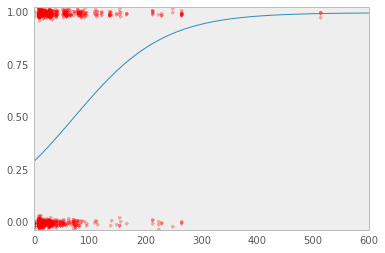

In [72]:
jitter = np.random.normal(scale=0.01, size=len(x))
plot(x, y+jitter, 'r.', alpha=0.3)
yticks([0,.25,.5,.75,1])
xvals = np.linspace(0, 600)
plot(xvals, invlogit(b0+b1*xvals))

As with our least squares model, we can easily fit logistic regression models in `statsmodels`, in this case using the `GLM` (generalized linear model) class with a binomial error distribution specified.

In [74]:
logistic = sm.GLM(y, sm.add_constant(x), family=sm.families.Binomial()).fit()
logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1308
Model:                            GLM   Df Residuals:                     1306
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -827.02
Date:                Mon, 24 Jun 2013   Deviance:                       1654.0
Time:                        21:38:17   Pearson chi2:                 1.33e+03
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.8824      0.076    -11.684      0.000        -1.030    -0.734
x1             0.0125      0.002      7.762      0.000         0.009     0.016
==============================================================================
"""

### Exercise: multivariate logistic regression

Which other variables might be relevant for predicting the probability of surviving the Titanic? Generalize the model likelihood to include 2 or 3 other covariates from the dataset.

## Bootstrapping

Parametric inference can be **non-robust**:

* inaccurate if parametric assumptions are violated
* if we rely on asymptotic results, we may not achieve an acceptable level of accuracy

Parmetric inference can be **difficult**:

* derivation of sampling distribution may not be possible

An alternative is to estimate the sampling distribution of a statistic *empirically* without making assumptions about the form of the population.

We have seen this already with the kernel density estimate.

### Non-parametric Bootstrap

The bootstrap is a resampling method discovered by [Brad Efron](http://www.jstor.org/discover/10.2307/2958830?uid=3739568&uid=2&uid=4&uid=3739256&sid=21102342537691) that allows one to approximate the true sampling distribution of a dataset, and thereby obtain estimates of the mean and variance of the distribution.

Bootstrap sample:

<div style="font-size: 120%;">  
$$S_1^* = \{x_{11}^*, x_{12}^*, \ldots, x_{1n}^*\}$$
</div>

$S_i^*$ is a sample of size $n$, **with** replacement.

In Python, we have already seen the NumPy function `permutation` that can be used in conjunction with Pandas' `take` method to generate a random sample of some data without replacement:

In [75]:
np.random.permutation(titanic.name)[:5]

array([u'Honkanen, Miss. Eliina',
       u'Andersen-Jensen, Miss. Carla Christine Nielsine',
       u'Geiger, Miss. Amalie', u'Becker, Master. Richard F',
       u'Johnson, Mr. Malkolm Joackim'], dtype=object)

Similarly, we can use the `random.randint` method to generate a sample *with* replacement, which we can use when bootstrapping.

In [76]:
random_ind = np.random.randint(0, len(titanic), 5)
titanic.name[random_ind]

659              Baclini, Miss. Marie Catherine
1029                        Moran, Mr. Daniel J
1129                  Petterson, Mr. Johan Emil
556                 Sharp, Mr. Percival James R
1045    Myhrman, Mr. Pehr Fabian Oliver Malkolm
Name: name, dtype: object

We regard S as an "estimate" of population P

> population : sample :: sample : bootstrap sample

The idea is to generate replicate bootstrap samples:

<div style="font-size: 120%;">  
$$S^* = \{S_1^*, S_2^*, \ldots, S_R^*\}$$
</div>

Compute statistic $t$ (estimate) for each bootstrap sample:

<div style="font-size: 120%;">  
$$T_i^* = t(S^*)$$
</div>

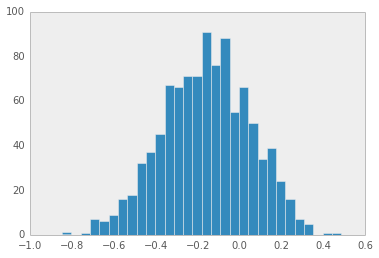

In [77]:
n = 10
R = 1000
# Original sample (n=10)
x = np.random.normal(size=n)
# 1000 bootstrap samples of size 10
s = [x[np.random.randint(0,n,n)].mean() for i in range(R)]
_ = hist(s, bins=30)

### Bootstrap Estimates

From our bootstrapped samples, we can extract *estimates* of the expectation and its variance:

$$\bar{T}^* = \hat{E}(T^*) = \frac{\sum_i T_i^*}{R}$$

$$\hat{\text{Var}}(T^*) = \frac{\sum_i (T_i^* - \bar{T}^*)^2}{R-1}$$


In [78]:
boot_mean = np.sum(s)/R
boot_mean

-0.15933323217972145

In [79]:
boot_var = ((np.array(s) - boot_mean) ** 2).sum() / (R-1)
boot_var

0.044061864233632578

Since we have estimated the expectation of the bootstrapped statistics, we can estimate the **bias** of T:

$$\hat{B}^* = \bar{T}^* - T$$


In [80]:
boot_mean - np.mean(x)

-0.00067633809837364112

### Bootstrap error

There are two sources of error in bootstrap estimates:

1. **Sampling error** from the selection of $S$.
2. **Bootstrap error** from failing to enumerate all possible bootstrap samples.

For the sake of accuracy, it is prudent to choose at least R=1000

### Bootstrap Percentile Intervals

An attractive feature of bootstrap statistics is the ease with which you can obtain an estimate of *uncertainty* for a given statistic. We simply use the empirical quantiles of the bootstrapped statistics to obtain percentiles corresponding to a confidence interval of interest.

This employs the *ordered* bootstrap replicates:

$$T_{(1)}^*, T_{(2)}^*, \ldots, T_{(R)}^*$$

Simply extract the $100(\alpha/2)$ and $100(1-\alpha/2)$ percentiles:

$$T_{[(R+1)\alpha/2]}^* \lt \theta \lt T_{[(R+1)(1-\alpha/2)]}^*$$

In [81]:
s_sorted = np.sort(s)
s_sorted[:10]

array([-0.84783322, -0.729463  , -0.70891663, -0.70277966, -0.70118232,
       -0.69761647, -0.68948506, -0.68308688, -0.67812924, -0.66995858])

In [82]:
s_sorted[-10:]

array([ 0.28296582,  0.29250432,  0.30557177,  0.31954429,  0.32994401,
        0.33001289,  0.33514567,  0.34787314,  0.41920685,  0.48525756])

In [83]:
alpha = 0.05
s_sorted[[(R+1)*alpha/2, (R+1)*(1-alpha/2)]]

array([-0.55827684,  0.22701275])

### Exercise: Cervical dystonia bootstrap estimates

Use bootstrapping to estimate the mean of one of the treatment groups, and calculate percentile intervals for the mean.